#  Student Information

     

### Wilfer Alexander Echavarria Vargas
## Student Numer:
    852538228     
## Date: 
    2022-05-02


# Question 1. Description of the dataset assigned to the student.
    The Abalone Datas
    Abalone is a type of consumable snail whose price varies as per its age and as mentioned here: The aim is to predict the age of abalone from physical measurements. The age     of abalone is traditionally determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope — a boring and time-       
    consuming task. Other measurements, which are easier to obtain, are used to predict the age. 



In [2]:
#We import the necessary libraries for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from pylab import rcParams
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from collections import Counter
rcParams['figure.figsize'] = 14, 8.7 
LABELS = ["Normal","Fraud"]
import warnings
warnings.filterwarnings('ignore')
sns.set()
%matplotlib inline

 ## a. How many features does the dataset have? Is there a target variable? Explain and show code
    The Abalone Dataset is composed of the following attributes:
    1. Sexo: This is the gender of the abalone and has categorical value (M, F or I).
    2. Length : The longest measurement of the abalone shell in mm. Continuous numeric value.
    3. Diameter : The measurement of the abalone shell perpendicular to length in mm. Continuous numeric value.
    4. Height : Height of the shell in mm. Continuous numeric value.
    5. Whole Weight : Weight of the abalone in grams. Continuous numeric value.
    6. Shucked Weight : Weight of just the meat in the abalone in grams. Continuous numeric value.
    7. Viscera Weight : Weight of the abalone after bleeding in grams. Continuous numeric value.
    8. Shell Weight : Weight of the abalone after being dried in grams. Continuous numeric value.
    9. Rings : This is the target, that is the feature that we will train the model to predict. As mentioned earlier, we are interested in the age of the abalone and it has     been established that number of rings + 1.5 gives the age. Discrete numeric value.


In [2]:
#we open the file using pandas with the read attribute and separate by commas
abalone = pd.read_csv('abalone.csv', sep=',')
#Show we show the amount of data in the dataset
print('Total records: %d' % len(abalone))
# The form is the number of rows and columns of the DataFrame
abalone.shape

Total records: 4177


(4177, 9)

In [3]:
# this line displays the first five rows of the dataset
abalone.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


   The Target Attribute, is the ring attribute which are between 1 and 29 rings in an abalone

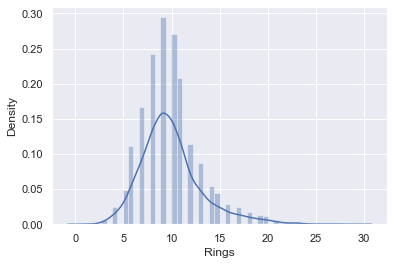

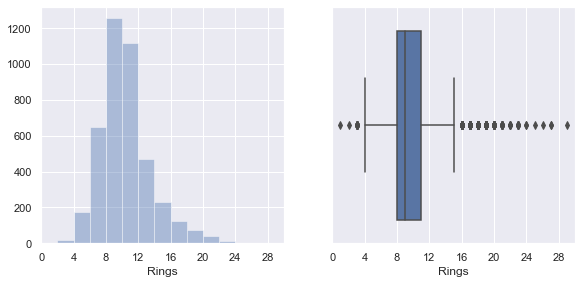

In [4]:
rows = 4
cols = 4
i = 0

abalone['Rings'].describe()
sns.distplot(abalone['Rings'])

plt.figure(figsize=(cols * 5, rows * 5))

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.distplot(abalone['Rings'], kde=False, bins=range(0, 31, 2))


i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.boxplot(abalone['Rings'])

## b. How many features are numerical, textual, categorical or Boolean? Is there any evident dependency between the features? Explain and show code.

In [5]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


we have a categorical attribute that is the sex of the abalone, we have 8 numeric characteristics of type float and one of integer type that are the rings

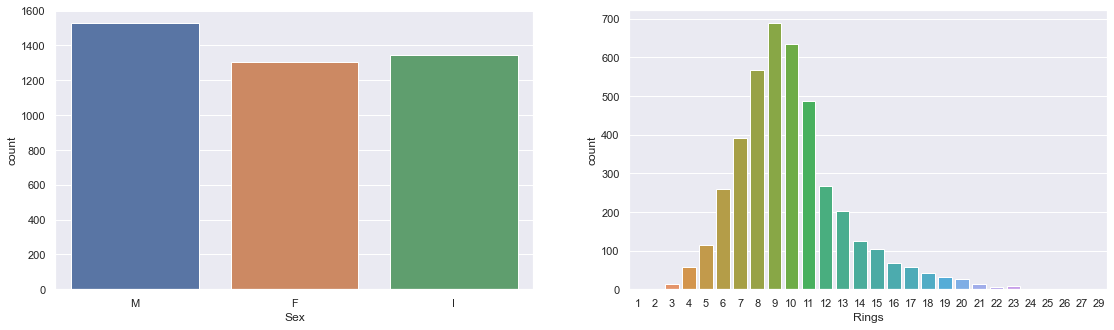

In [6]:
#we graph counting the amount of abalone by age using seanborn and how many rings
rows = 6
cols = 6
i = 0
plt.figure(figsize=(cols * 10, rows * 6))

i += 1

plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.countplot(abalone['Sex'])

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.countplot(abalone['Rings'])

however, the sex function is not that useful for regression analysis because the output is of type object. Therefore, it would be useful to convert it to boolean functions, for a regression analysis we could use the rings which are of integer type

In [7]:
# The describe() method returns description of the data in the DataFrame.
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


    1.count -The number of not-empty values. 
    2.mean - The average (mean) value.
    3.std -  The standard deviation.
    4.min -  the minimum value.
    5.25% -  The 25% percentile*.
    6.50% -  The 50% percentile*.
    7.75% -  The 75% percentile*.
    8.max -  the maximum value.

In [8]:
abalone.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In this section we will look at how the attributes of the data set are related and how the independent variables influence the target variable. We can see this better with a heat map

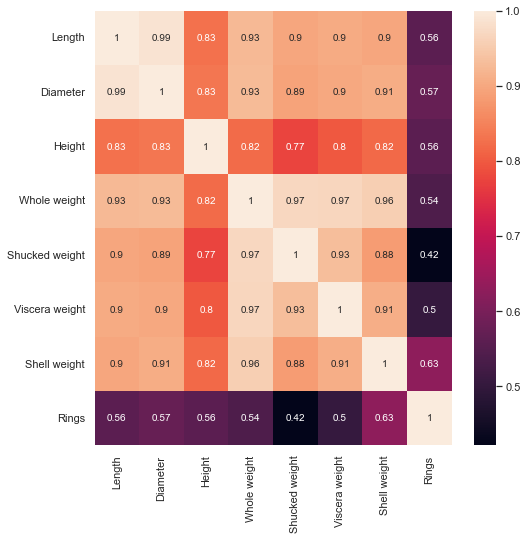

In [298]:
plt.figure(figsize=(8, 8))
corr = abalone.corr()
_ = sns.heatmap(corr, annot=True)

When analyzing the correlation matrix, we observe that weight and height are the data that have the most relationship with the number of rings

<Figure size 360x360 with 0 Axes>

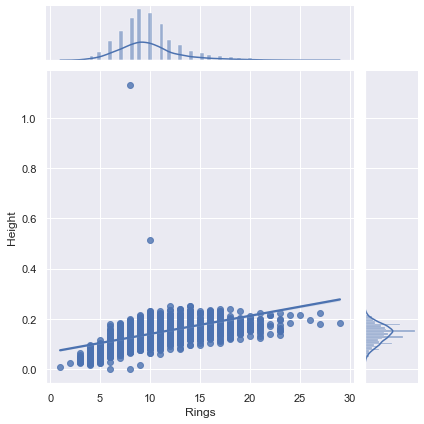

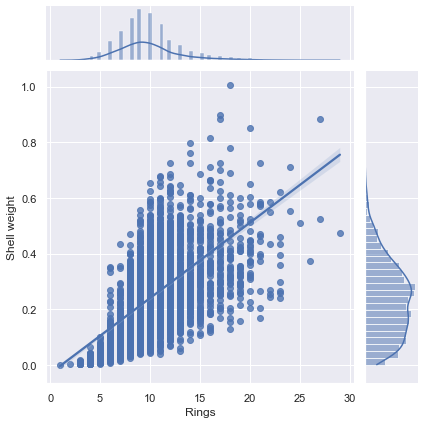

In [9]:
#The next thing is to graph making the join between the data that are related to each other according to our heat map or correlation
plt.figure(figsize=(5, 5))

_ = sns.jointplot(data=abalone, x='Rings', y='Height', kind='reg')
_ = sns.jointplot(data=abalone, x='Rings', y='Shell weight', kind='reg')

## c. Is this a supervised or unsupervised data mining task? Explain and show code.


Is a supervised data mining task, the main task is to predict the Abalone Age Prediction from physical measurements

In the abalone dataset the goal is to be able to predict the age of abalone is to predict the age of abalone using physical measurements.
Age is not a piece of information that we have in our dataset, which we are going to incorporate with the following value +1.5 to determine the age of abalone

To calculate the age we are going to replace the rings attribute with ages and we are going to modify it to be able to determine the age of abalone

In [10]:
#We replace the rings for Years and add the ages column to our dataset
abalone['Ages'] = abalone['Rings']+1.5
abalone.drop('Rings', axis = 1, inplace= True)

In [11]:
print(abalone.shape)
abalone.dtypes

(4177, 9)


Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Ages              float64
dtype: object

In [12]:
# converts a categorical feature to binary numeric features indicating the presence or absence of the values that were originally there in the feature
abalone = pd.get_dummies(abalone)
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Ages,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,0,1,0


In [13]:
print(abalone.shape)
abalone.dtypes

(4177, 11)


Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Ages              float64
Sex_F               uint8
Sex_I               uint8
Sex_M               uint8
dtype: object

In [14]:
# The describe() method returns description of the data in the DataFrame.
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Ages,Sex_F,Sex_I,Sex_M
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684,0.312904,0.321283,0.365813
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.463731,0.467025,0.481715
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000,1.000000,1.000000,1.000000


Based on the above analysis, we can further validate the correlation with respect to the number of years. We tested many values and found that the region bounded by years less than 10 has a higher correlation between the independent attributes and the target variable.

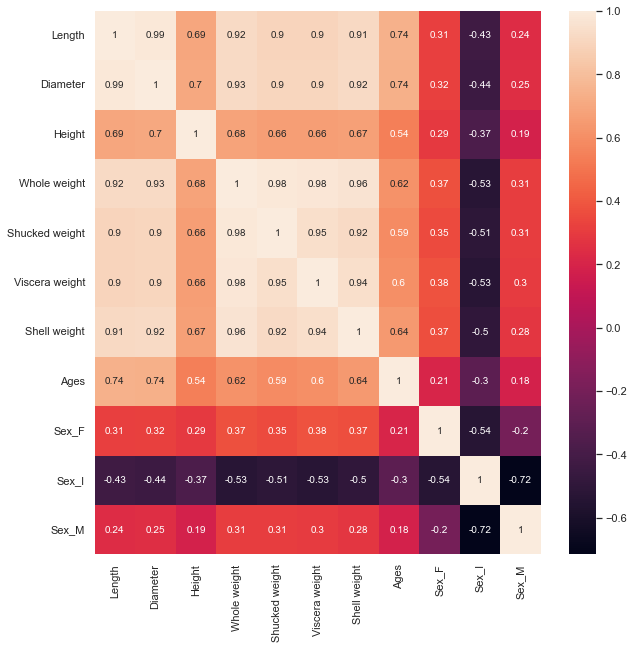

In [15]:
i_abalone = abalone[abalone['Ages'] < 10]

plt.figure(figsize=(10, 10))
corr = i_abalone.corr()
_ = sns.heatmap(corr, annot=True)

In the following graph we observe the positive correlation between the attributes Size and Years: 
what this analysis shows us is that the older the abalone is, its other attributes grow the same

<Figure size 720x360 with 0 Axes>

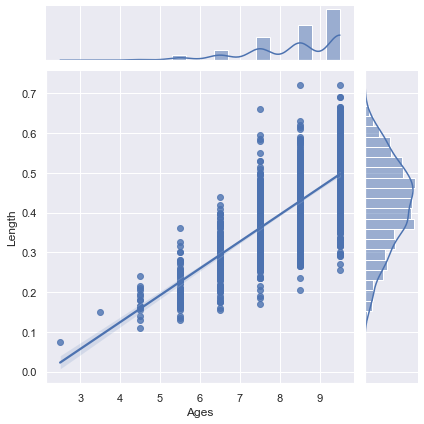

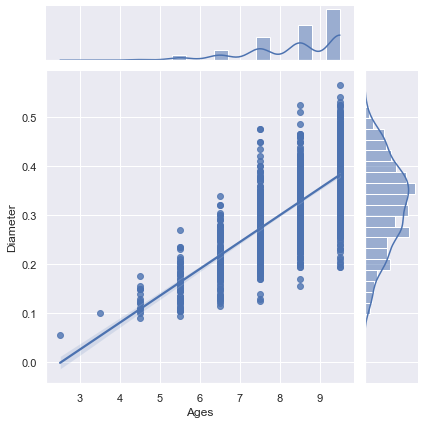

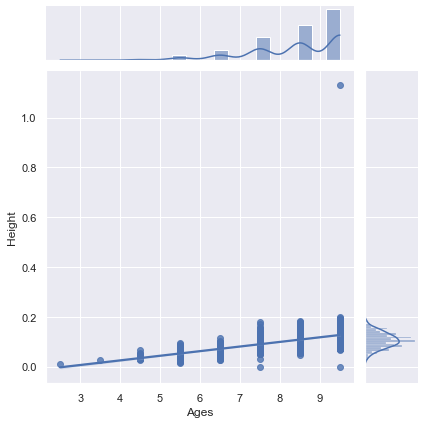

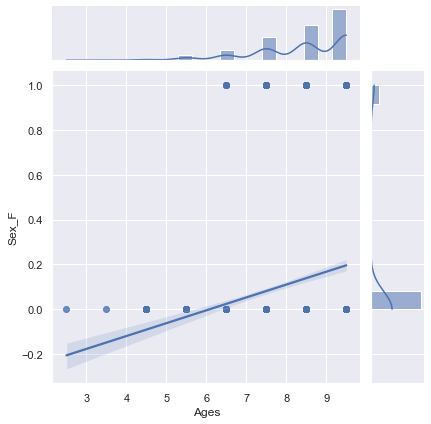

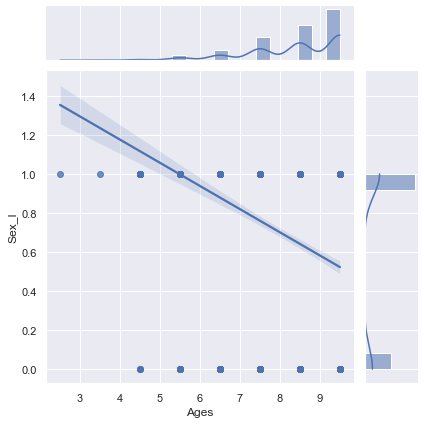

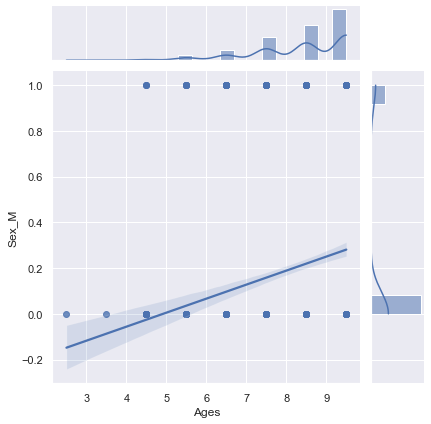

In [16]:
plt.figure(figsize=(10, 5))

_ = sns.jointplot(data=i_abalone, x='Ages', y='Length',  kind='reg')
_ = sns.jointplot(data=i_abalone, x='Ages', y='Diameter', kind='reg')
_ = sns.jointplot(data=i_abalone, x='Ages', y='Height', kind='reg')
_ = sns.jointplot(data=i_abalone, x='Ages', y='Sex_F', kind='reg')
_ = sns.jointplot(data=i_abalone, x='Ages', y='Sex_I', kind='reg')
_ = sns.jointplot(data=i_abalone, x='Ages', y='Sex_M', kind='reg')

to better understand this we are going to plot a violin

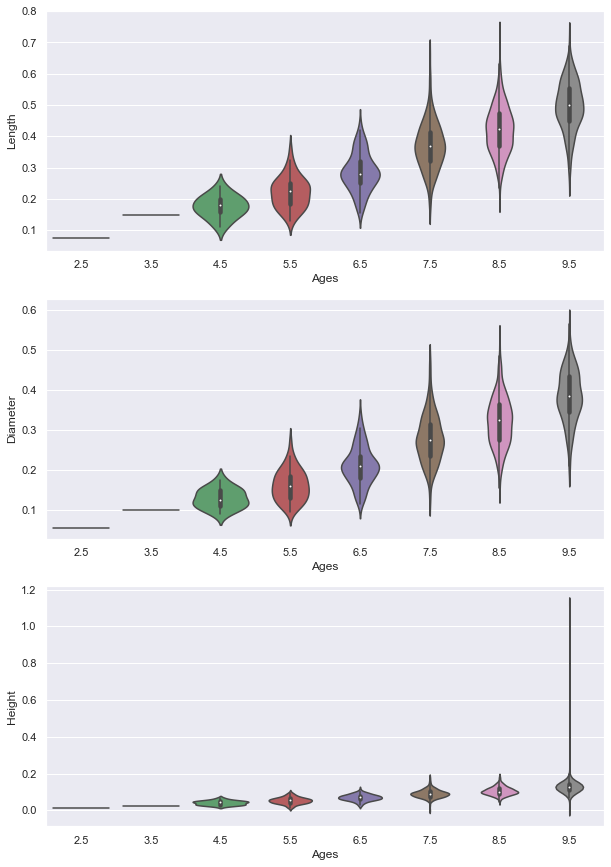

In [17]:
plt.figure(figsize=(10, 15))

colors = sns.color_palette()

rows = 3
cols = 1
i = 0

i += 1
plt.subplot(rows, cols, i)
_ = sns.violinplot(data=i_abalone, x='Ages', y='Length')

i += 1
plt.subplot(rows, cols, i)
_ = sns.violinplot(data=i_abalone, x='Ages', y='Diameter')

i += 1
plt.subplot(rows, cols, i)
_ = sns.violinplot(data=i_abalone, x='Ages', y='Height')

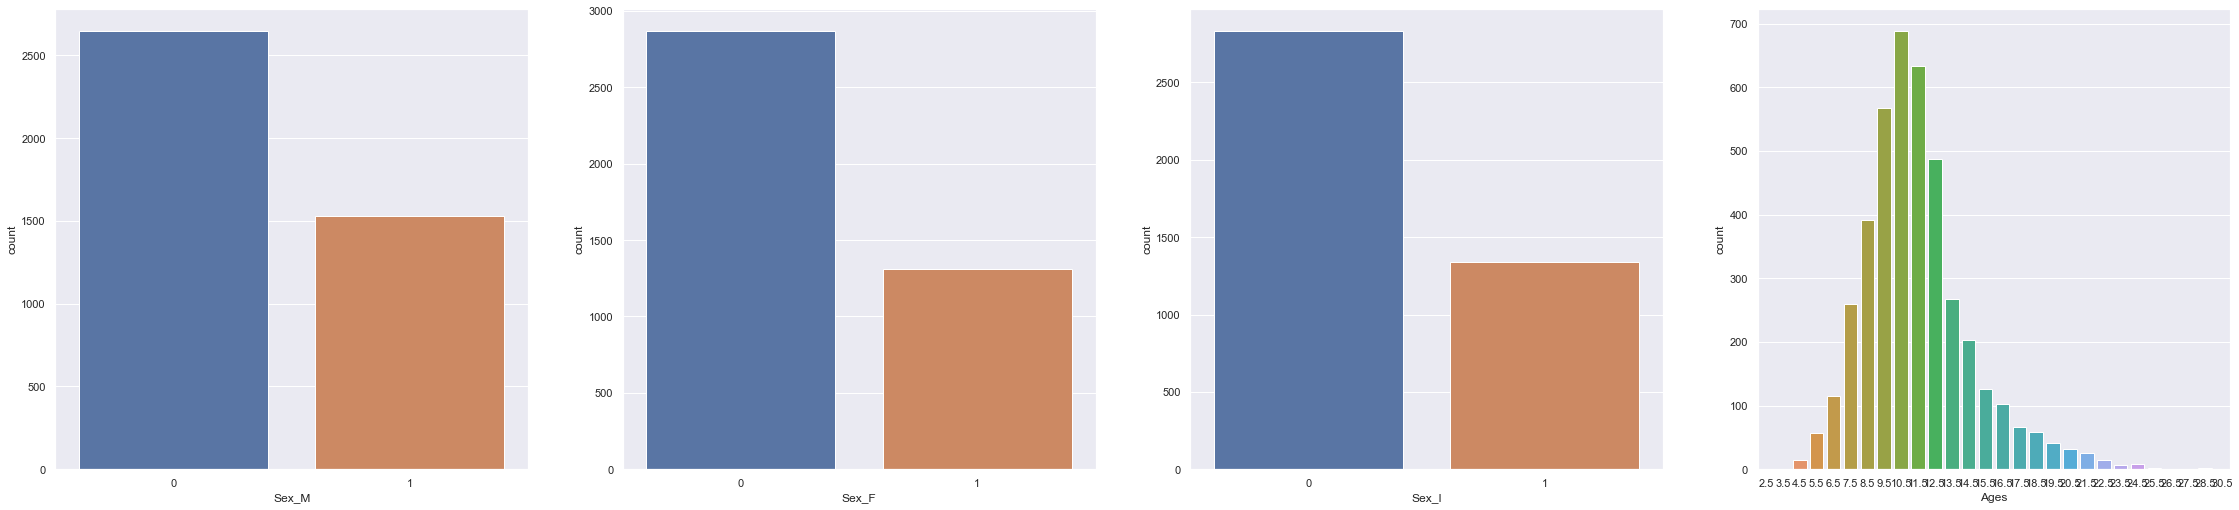

In [18]:
#we graph counting the amount of abalone by age using seanborn and how many rings
rows = 10
cols = 10
i = 0
plt.figure(figsize=(cols * 10, rows * 10))

i += 1

plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.countplot(abalone['Sex_M'])

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.countplot(abalone['Sex_F'])

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.countplot(abalone['Sex_I'])


i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.countplot(abalone['Ages'])

# Question 2. Data quality and data cleansing

   # a. Are there missing values in the data? Explain the most common techniques used to deal with missing values in a dataset. Show how you would perform this analysis in Python

     Data cleansing

Before dealing with missing data, it is important to determine their prevalence and randomness, as they may imply a reduction in sample size. You also have to make sure that the management of missing data is not biased or hides an uncomfortable truth.


To find missing values in our data set or missing values we can use the following 5 ways

1. with pandas isnull function
2. with the pandas info method
3. with the seaborn heatmap
4. with library missingno
5. with a bar graph


In [19]:
# Missing data: isnull
total = abalone.isnull().sum().sort_values(ascending = False)
percent = (abalone.isnull().sum() / abalone.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Ages', 'Rings'])
missing_data.head(5)

,Ages,Rings
Length,0,0.0
Diameter,0,0.0
Height,0,0.0
Whole weight,0,0.0
Shucked weight,0,0.0


In [20]:
#with the pandas info method
abalone.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Ages            4177 non-null   float64
 8   Sex_F           4177 non-null   uint8  
 9   Sex_I           4177 non-null   uint8  
 10  Sex_M           4177 non-null   uint8  
dtypes: float64(8), uint8(3)
memory usage: 273.4 KB


when validating if there are null values or not, we find that for our data set there are no missing values

In [21]:
abalone = pd.get_dummies(abalone)
abalone.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Ages,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5,0,1,0


   # b. Are the classes balanced? Explain the most common techniques used to deal with the class imbalance problem.

## possible causes of unbalanced data
     a. Small Disjuncts.
     b. Lack of density.
     c. Class Separability Problem.
     d. Noisy data.
     e. Dataset shift.
 
## solutions to the problem
     a. resampling.
     b. ensemble.
     c. hybrid techniques.
 

 

In [22]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Ages,Sex_F,Sex_I,Sex_M
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684,0.312904,0.321283,0.365813
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.463731,0.467025,0.481715
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000,1.000000,1.000000,1.000000


In [23]:
#Let's see how many rows we have and how many there are of each class:
abalone.shape

(4177, 11)

In [24]:
print(abalone.shape)
abalone.dtypes

(4177, 11)


Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Ages              float64
Sex_F               uint8
Sex_I               uint8
Sex_M               uint8
dtype: object

In this case, the classes are not balanced since observing the data we find values with many differences where one value is very high and the other is not.
With the following graphs it is clearer that it is not balanced

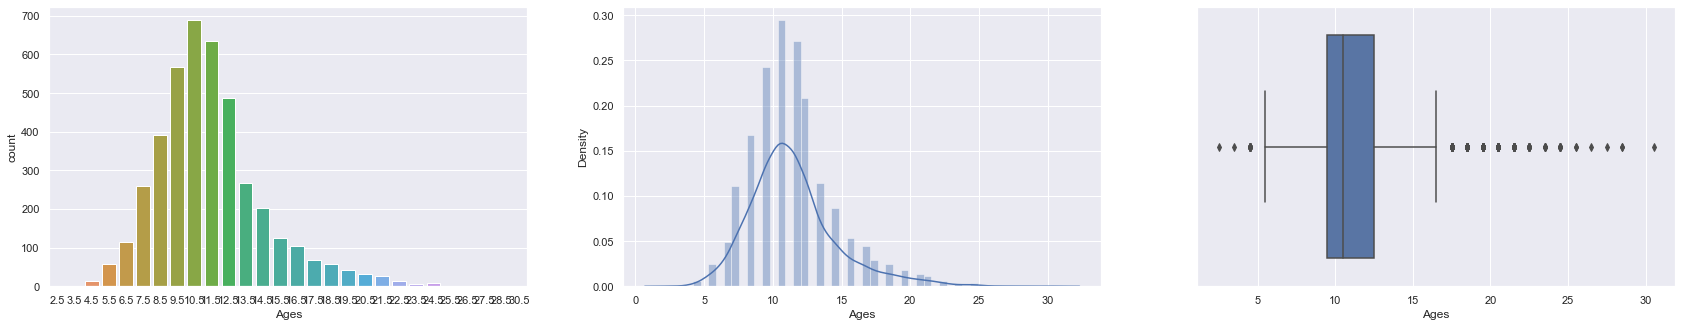

In [25]:
rows = 6
cols = 6
i = 0

plt.figure(figsize=(cols * 10, rows * 6))

i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)
_ = sns.countplot(abalone['Ages'])

i += 1
plt.subplot(rows, cols, i)
_ =sns.distplot(abalone['Ages'])

i += 1
plt.subplot(rows, cols, i)
_ =sns.boxplot(abalone['Ages'])


   # c. Are there outliers in the dataset? Show how you would perform the analysis in Python
       We use the box plot to detect the values that generate the outliers the values that are above 15 are the outliers of our dataset
       

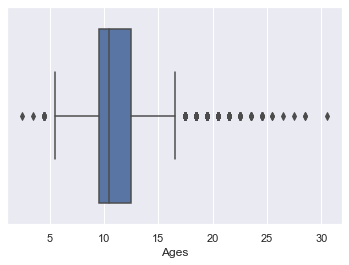

In [26]:
sns.boxplot(abalone['Ages']);

In [27]:
# Position of the Outlier
print(np.where(abalone['Ages']>15))

(array([   0,    6,    7,    9,   10,   28,   31,   32,   33,   36,   41,
         72,   75,   79,   82,   83,   84,   90,   94,   95,  101,  102,
        122,  128,  129,  130,  142,  150,  157,  163,  164,  165,  166,
        167,  168,  170,  180,  181,  192,  197,  198,  214,  229,  231,
        232,  240,  253,  254,  255,  256,  258,  266,  270,  271,  272,
        273,  275,  277,  278,  280,  283,  284,  287,  290,  292,  293,
        294,  308,  310,  311,  312,  313,  314,  316,  318,  334,  336,
        337,  339,  340,  341,  349,  351,  354,  355,  357,  358,  359,
        360,  362,  363,  365,  369,  370,  371,  372,  373,  375,  378,
        380,  388,  407,  410,  411,  414,  415,  416,  417,  418,  420,
        426,  427,  428,  429,  430,  431,  432,  433,  437,  442,  447,
        449,  450,  451,  452,  454,  456,  468,  469,  475,  477,  478,
        479,  480,  481,  482,  483,  487,  489,  490,  493,  494,  495,
        497,  501,  502,  504,  505,  507,  509,  

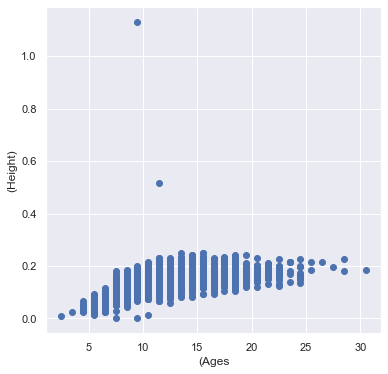

In [28]:
# Scatter plot
fig, ax = plt.subplots(figsize = (6,6))
ax.scatter(abalone['Ages'], abalone['Height'])
 
# x-axis label
ax.set_xlabel('(Ages')
 
# y-axis label
ax.set_ylabel('(Height)')
plt.show()

    Scatter plot

    Looking at the graph, it can be summarized that most of the data points are in the lower left corner of the graph, but there are few points that are exactly opposite the upper right corner of the graph. The points in the upper right corner can be considered outliers.
    Using the approximation you can say that all those data points that are x > 30 and y > 0.4 are outliers. The following code can get the exact position of all those points that meet these conditions.
    

In [29]:
# Above Upper bound
upper = abalone['Ages'] >= (Q3+1.5*IQR)
 
print("Upper bound:",upper)
print(np.where(upper))
 
# Below Lower bound
lower = abalone['Ages'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))

NameError: name 'Q3' is not defined

Defined limits and index of respective outliers to the limits

# Question 3. Charting.
    Select three charts from Seaborn or Matplotlib, plot the dataset with Python using these three charts and describe what you see in your own words.
    

first I create a new dataset only with the data of the years and the sex


In [30]:
#We replace the rings for Years and add the ages column to our dataset
abalone['Rings'] = abalone['Ages'] +1.5
abalone.drop('Rings', axis = 1, inplace= True)

abalone[['Ages','Sex_F','Sex_M','Sex_I']]

,Ages,Sex_F,Sex_M,Sex_I
0,16.5,0,1,0
1,8.5,0,1,0
2,10.5,1,0,0
3,11.5,0,1,0
4,8.5,0,0,1
...,...,...,...,...
4172,12.5,1,0,0
4173,11.5,0,1,0
4174,10.5,0,1,0
4175,11.5,1,0,0


Finally, we are hitting descriptive statistics. The mean method gives you the averages you want to know about the DF


In [31]:
abalone['Ages'].mean()

11.433684462532918

In [32]:
#The first thing is to meet "years". Let's see your description with everything described
abalone[['Ages','Sex_F','Sex_M','Sex_I']].describe()

,Ages,Sex_F,Sex_M,Sex_I
count,4177.000000,4177.000000,4177.000000,4177.000000
mean,11.433684,0.312904,0.365813,0.321283
std,3.224169,0.463731,0.481715,0.467025
min,2.500000,0.000000,0.000000,0.000000
25%,9.500000,0.000000,0.000000,0.000000
50%,10.500000,0.000000,0.000000,0.000000
75%,12.500000,1.000000,1.000000,1.000000
max,30.500000,1.000000,1.000000,1.000000


Now let's ask for a picture - let's make a distplot graph, 
In this graph, what we can analyze is that the more years its relationship with the other attributes such as weight, long diameter, height and weight are increasing, but it also allows us to see that between 5 and 15 is where this relationship is most reflected and to measure that he is older his relationship with the other attributes are disappearing

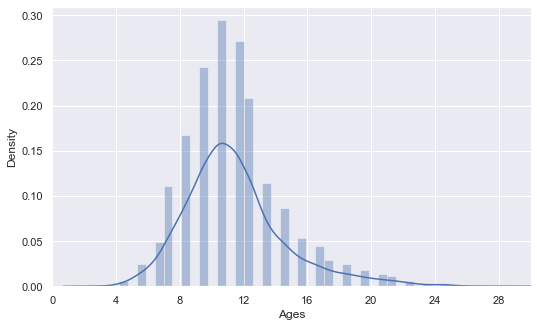

In [33]:
rows =6
cols =6
i=0
plt.figure(figsize=(cols * 10, rows * 6))
i += 1
plt.subplot(rows, cols, i)
plt.xticks(range(0, 31, 4))
plt.xlim(0, 30)          
_=sns.distplot(abalone['Ages'])              

In [38]:
# Create an aggregation function and determine how many elements of each species the petal_width_cm data is missing
def count_nulls(series):
    return len(series)-series.count()
abalone.groupby('Sex_F').agg({'Ages': [count_nulls]})


,Ages
,count_nulls
Sex_F,
0,0
1,0


In [39]:
def count_nulls(series):
    return len(series)-series.count()
abalone.groupby('Sex_M').agg({'Ages': [count_nulls]})

,Ages
,count_nulls
Sex_M,
0,0
1,0


In [40]:
def count_nulls(series):
    return len(series)-series.count()
abalone.groupby('Sex_I').agg({'Ages': [count_nulls]})

,Ages
,count_nulls
Sex_I,
0,0
1,0


When observing the dispersion matrix, the same behavior is evidenced in the following analysis
a. we have a range from 5 to 30 years
b. which determines that between 10 to 30 years there is more correlation with the other attributes of the dataset

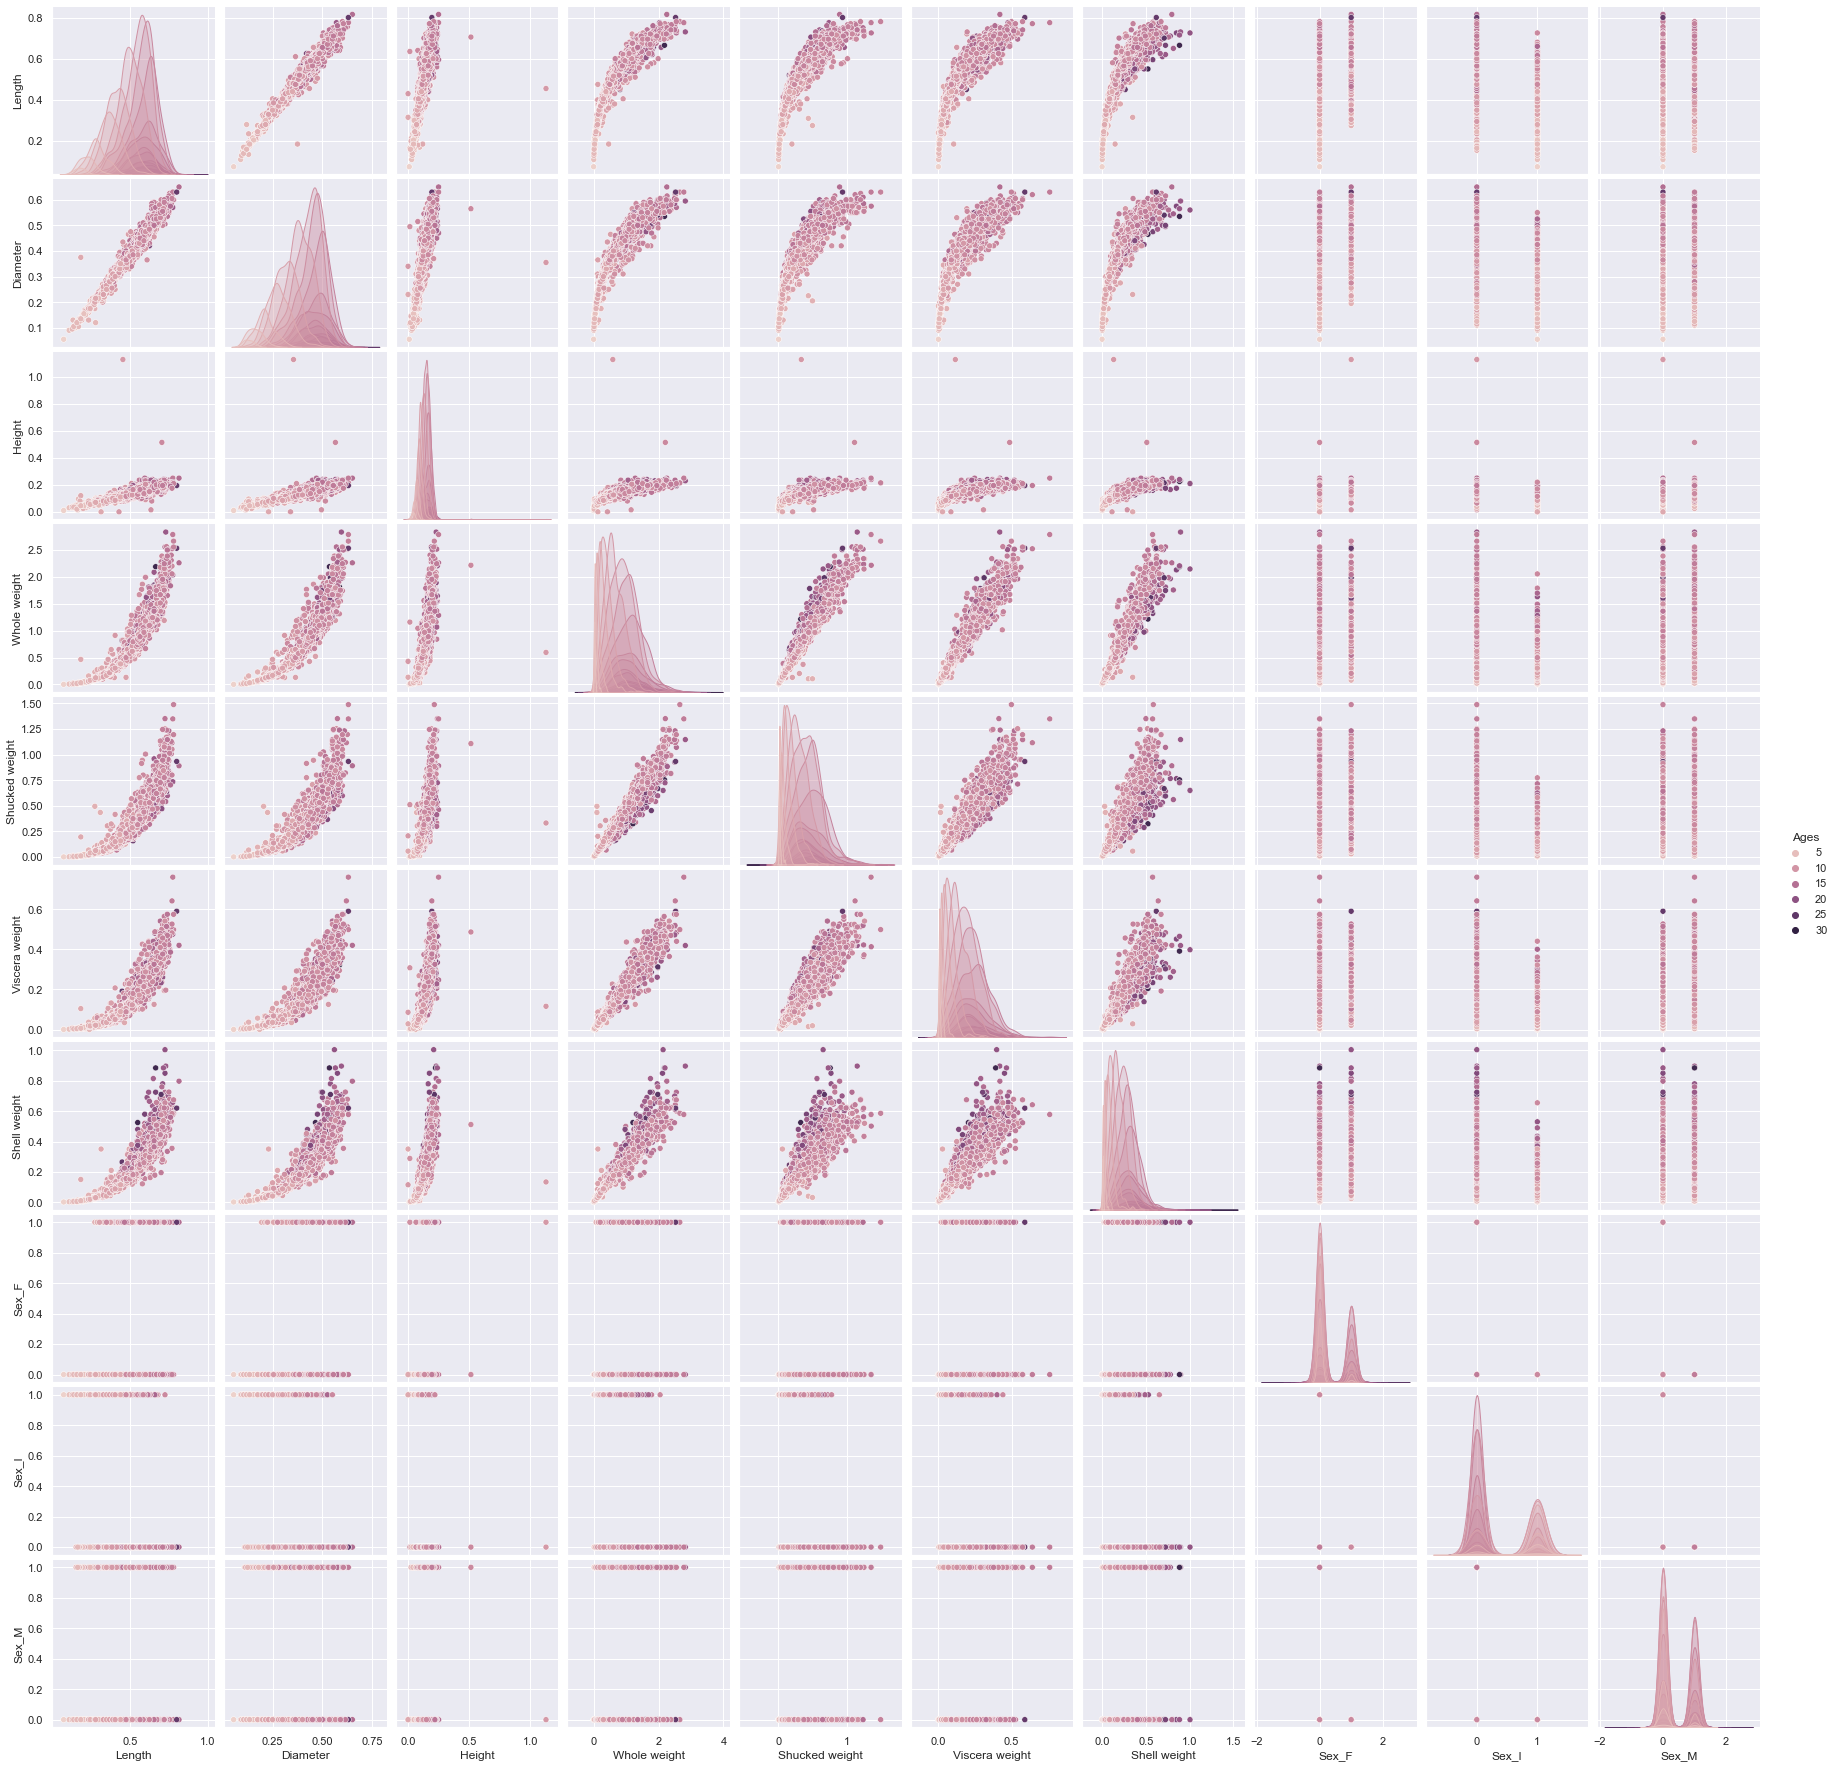

In [43]:
sns.pairplot(abalone.dropna(), hue='Ages')

With this last image we can conclude how the categories influence and correlate with the number of years x height year and weight of the abalone, these allow us to identify which are the attributes that are most related to each other,
for the lower values we can determine that the younger the fewer rings or the fewer years affects their height and weight downwards
when the abalone grows over 15 years old, its relationship is no longer significant with the other attributes and these data are not correlated

<Figure size 720x360 with 0 Axes>

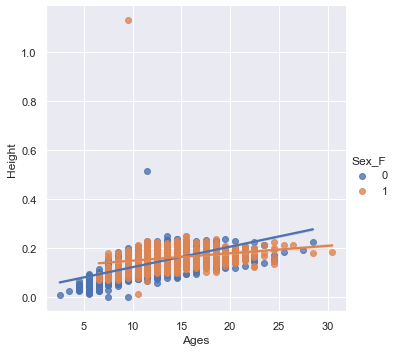

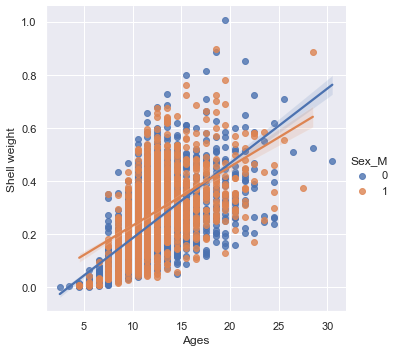

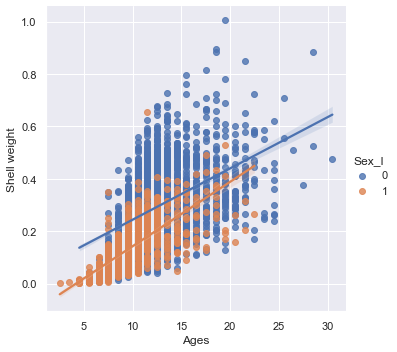

In [42]:
plt.figure(figsize=(10, 5))
_ = sns.lmplot(data=abalone, x='Ages', y='Height', hue='Sex_F', fit_reg=True)
_ = sns.lmplot(data=abalone, x='Ages', y='Shell weight', hue='Sex_M', fit_reg=True)
_ = sns.lmplot(data=abalone, x='Ages', y='Shell weight', hue='Sex_I', fit_reg=True)

 # Question 5. Data analysis.
   # Once you have identified the type of problem you have, define the Python code to analyse the data. Explain the result.
   - Unsupervised problem: analyse the data with 3 clustering algorithms. Explain which of the algorithms performs the best in identifying groupings.
   - Supervised problem (classification): use 3 classification algorithms and explain their performance.
   - Supervised problem (regression): using linear regression and polynomial regression, explain their performance.

In [412]:
#Regresion lineal simple (Time series and simple linear regression)
df = pd.read_csv('abalone.csv', sep=',')

In [413]:
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [414]:
df = pd.get_dummies(abalone)

In [416]:
df.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [417]:
#let's use train test split for training and tests
from sklearn.model_selection import train_test_split

In [419]:
#train the model
X_train, X_test, y_train, y_test = train_test_split(df.Rings.values.reshape(-1,1),df.Length.values,random_state=11)

In [396]:
#Let's check the sizes of train and test
X_train.shape

(3132, 1)

In [397]:
X_test.shape

(1045, 1)

In [398]:
#import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

In [399]:
#Assemble the estimator and do the fit
reglin = LinearRegression()

In [400]:
reglin.fit(X=X_train, y=y_train)

LinearRegression()

In [401]:
#Get the Coef and the INtercept
reglin.coef_

array([0.0203346])

In [402]:
reglin.intercept_

0.3223371070425277

In [403]:
#Let's test the model, create the prediction and expected objects
prediccion = reglin.predict(X_test)

In [404]:
esperado = y_test

In [405]:
#Build a loop showing p vs e for the data 5 by 5
for p,e in zip(prediccion[::300],esperado[::300]):
    print(f'prediccion:{p:.2f},esperado:{e:.2f}')

prediccion:0.53,esperado:0.63
prediccion:0.44,esperado:0.36
prediccion:0.46,esperado:0.35


In [406]:
#Let's predict the age of the abalosn using weight in sqft
predice = (lambda x:reglin.coef_*x+reglin.intercept_)

In [407]:
predice(7)

array([0.46467932])

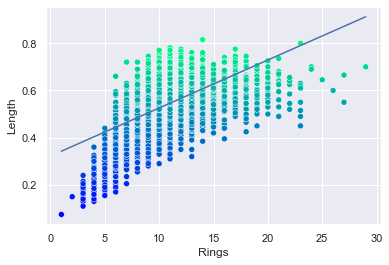

In [411]:
#And now we visualize the linear regression with seaborn
import seaborn as sns
axes = sns.scatterplot(data = df, x="Rings", y = "Length", hue= "Length",palette="winter",legend=False)
import numpy as np
x = np.array([min(df.Rings.values),max(df.Rings.values)])
y = predice(x)

import matplotlib.pyplot as plt
    
line =plt.plot(x,y)

## Multiple linear regression

In [7]:
df = pd.read_csv('abalone.csv', sep=',')
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [8]:
df = pd.get_dummies(abalone)

NameError: name 'abalone' is not defined

In [9]:
df.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [10]:
abalondf = df.sample(frac=0.1,random_state=17)

In [11]:
sns.set(font_scale=2)

In [12]:
sns.set_style('whitegrid')

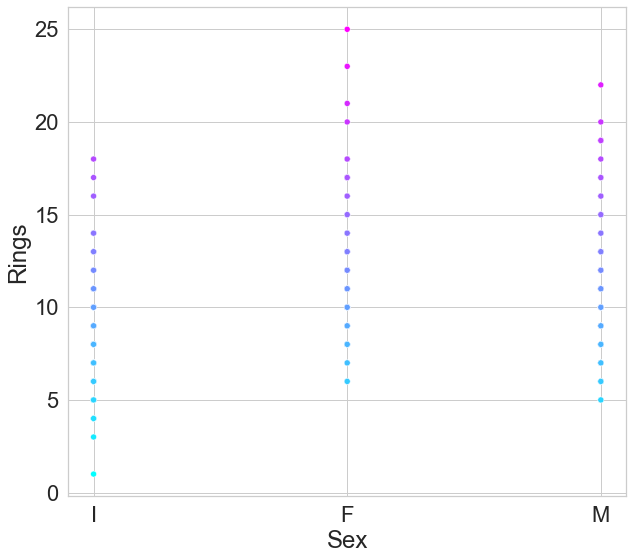

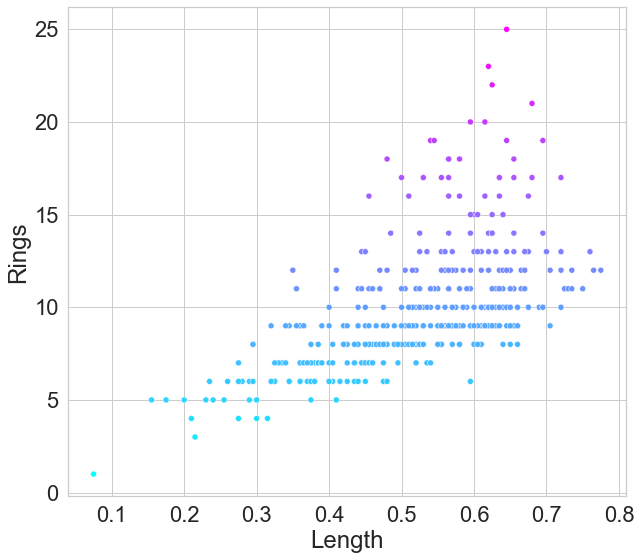

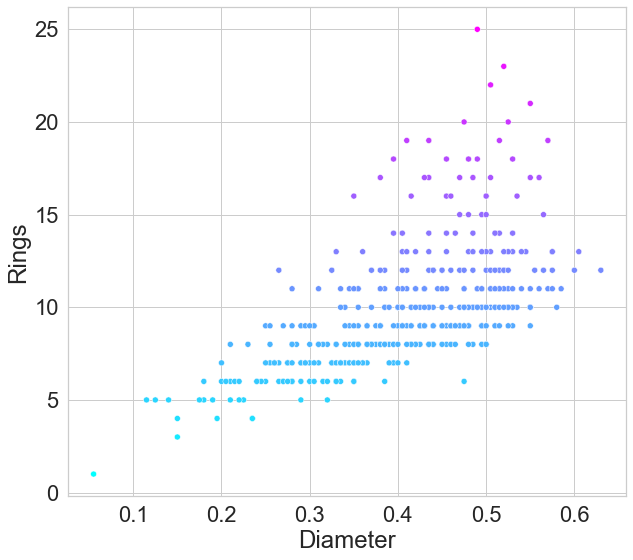

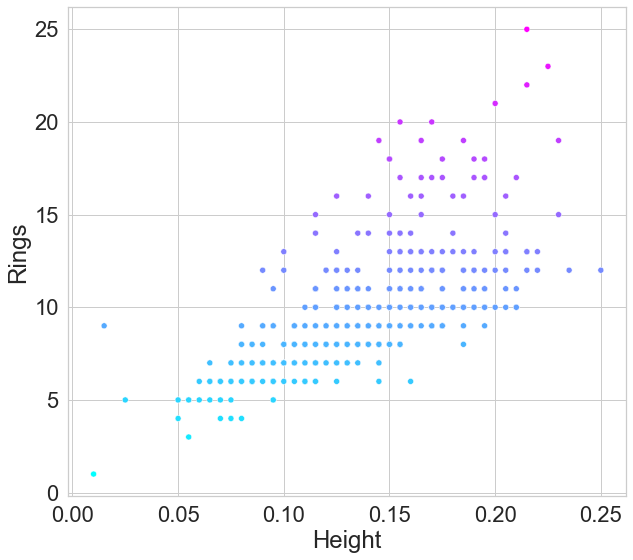

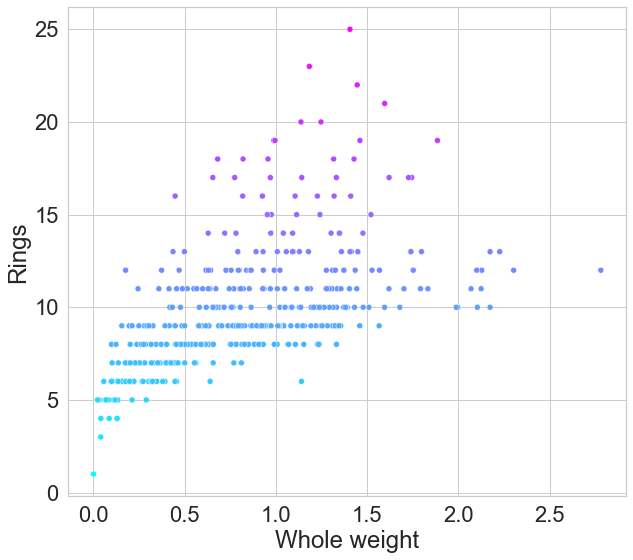

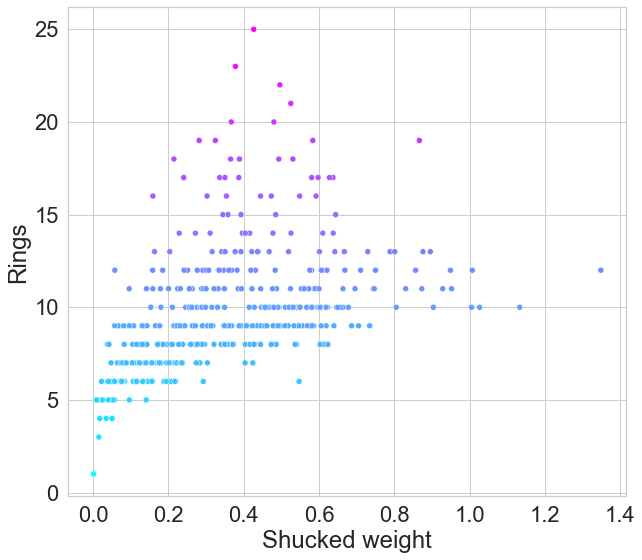

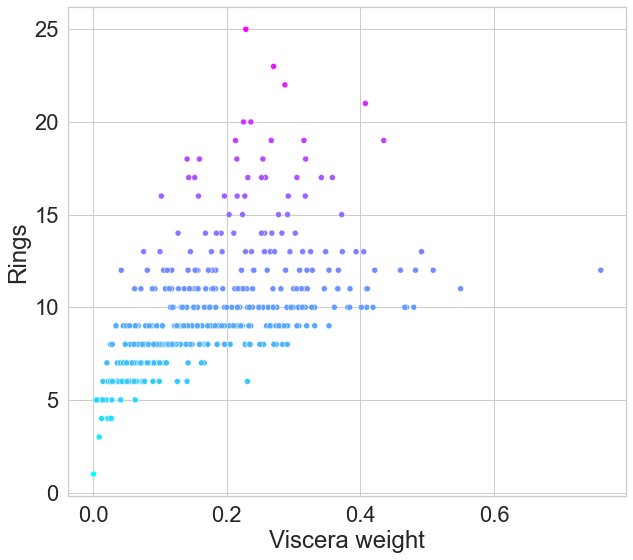

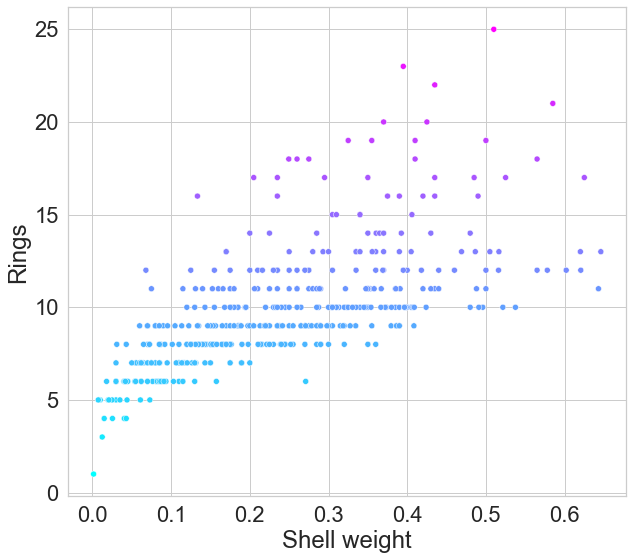

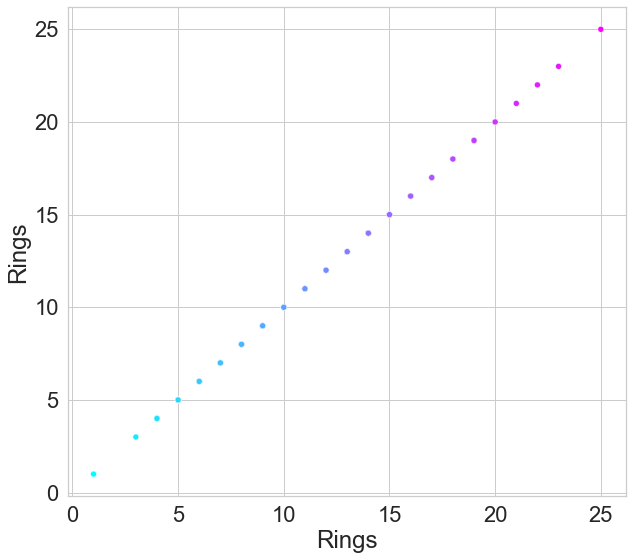

In [13]:
for feature in df:
    plt.figure(figsize=(10,9))
    sns.scatterplot(data = abalondf, x=feature, y='Rings',hue='Rings',palette='cool',legend=False)

# Sample data description

In [486]:
pip install rfpimp


  Created wheel for rfpimp: filename=rfpimp-1.3.7-py3-none-any.whl size=10667 sha256=d09dbbf8c12fd3c34e51795999a1bbbb06525d20612fd24d27b3189313b8ccb4
  Stored in directory: c:\users\admin-edigomez\appdata\local\pip\cache\wheels\d9\f2\53\6d8c73011f73fc347598d683ff8b2343605ad43474ae083816
Successfully built rfpimp


In [487]:
import rfpimp
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [474]:
df.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [475]:
# Data preparation 
features = ['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings','Sex_F','Sex_I','Sex_M']

In [476]:
# Train/test split
df_train, df_test = train_test_split(df, test_size=0.30)
df_train = df_train[features]
df_test = df_test[features]

X_train, y_train = df_train.drop('Rings',axis=1), df_train['Rings']
X_test, y_test = df_test.drop('Rings',axis=1), df_test['Rings']

In [479]:
X_train.shape

(3341, 10)

In [480]:
X_test.shape

(836, 10)

In [481]:
#Train 
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [488]:
# Permutation feature importance 

imp = rfpimp.importances(rf, X_test, y_test)

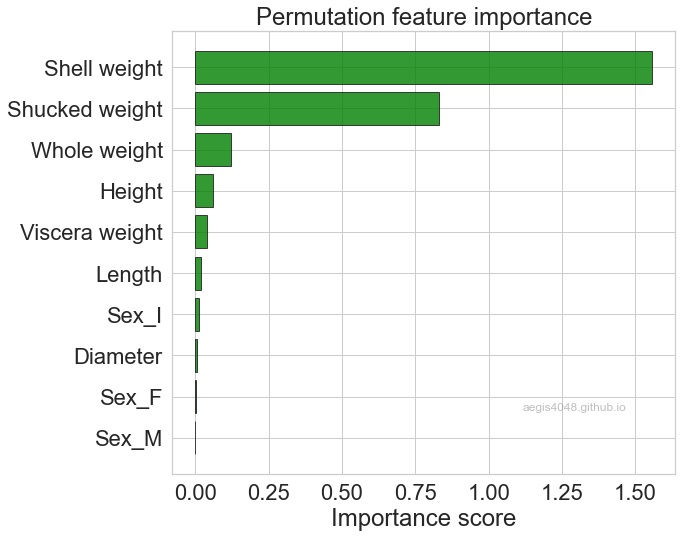

In [495]:
#Plot 
fig, ax = plt.subplots(figsize=(10, 8))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='green', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Permutation feature importance')
ax.text(0.8, 0.15, 'aegis4048.github.io', fontsize=12, ha='center', va='center',
        transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()

fig.tight_layout()

# Multiple linear regression

In [496]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [497]:
# Data preparation
df.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [498]:
# Data preparation

X = df['Rings'].values.reshape(-1,1)
y = df['Length'].values

In [499]:
# Train
ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

In [500]:
# Evaluate
r2 = model.score(X, y)


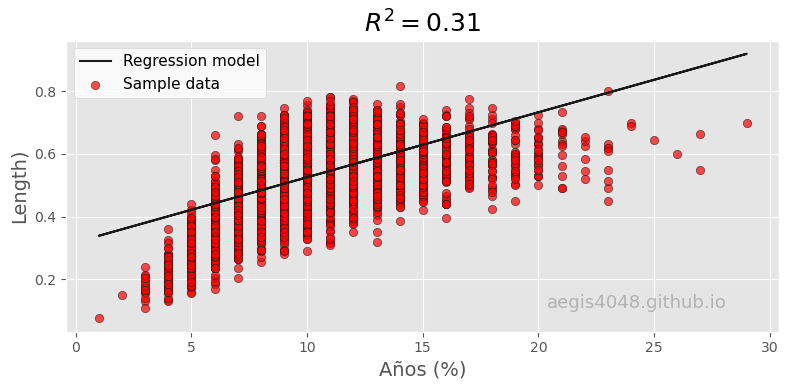

In [503]:
# Plot
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='red', alpha=0.7, label='Sample data')
ax.set_ylabel('Length)', fontsize=14)
ax.set_xlabel('Años (%)', fontsize=14)
ax.text(0.8, 0.1, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

we use simple linear regression which gives me a prediction accuracy of 63% so this model is not very viable

We also use multiple linear regression which, with this analyzing all the variables of our dataset, allows us to see how the age of the abalone interacts with a given variable such as weight and etc, but when doing the analysis it is not very exact either.

Using the simple description method and when training our machine to determine the behavior, we see that the abalone gets older, its weight and size is much greater, which will allow us to have a better profit when selling the abalone according to its greater weight, but even so our model is still not enough since it only has 0.31 accuracy

#   unsupervised learning clustering

In [53]:
#first import data
df = pd.read_csv('abalone.csv', sep=',')
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [55]:
df = pd.get_dummies(df)

In [56]:
df.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [57]:
#build your df_abalone object
df_abalone = df

In [58]:
# Data preparation 
features = ['Rings','Sex_F','Sex_I','Sex_M']

In [60]:
#we are going to reduce the s dimensions using the TSNE
from sklearn.manifold import TSNE

In [61]:
#we build the tsne object
tsne =TSNE(n_components=2, random_state=11)

In [64]:
#We transform the data to the specific number of dimensions and train the estimator
datoreducidos= tsne.fit_transform(df_abalone)

In [63]:
#this is the form of our data
datoreducidos.shape

(4177, 2)

In [65]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm 

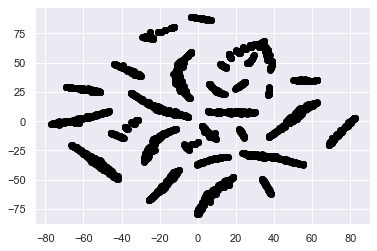

In [66]:
#We plot the reduced data where we only show the data that the model chose. It is the cluster that shows us the information of the abalone, we do it in black to see the information more clearly,
dots = plt.scatter(datoreducidos[:,0],datoreducidos[:,1],c='black')

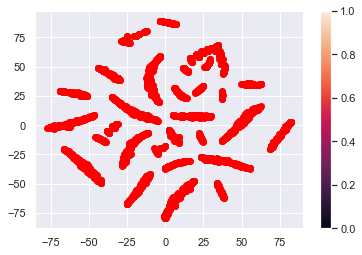

In [72]:
#
dots = plt.scatter(datoreducidos[:,0],datoreducidos[:,1],c='red',cmap=plt.cm.get_cmap('nipy_spectral_r',10))
colorbar = plt.colorbar(dots)

#   unsupervised learning K-means cluster

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 10)
plt.style.use('ggplot')

In [97]:
df_abalone.head(5)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [101]:
print(df_abalone.groupby('Rings').size())

Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
dtype: int64


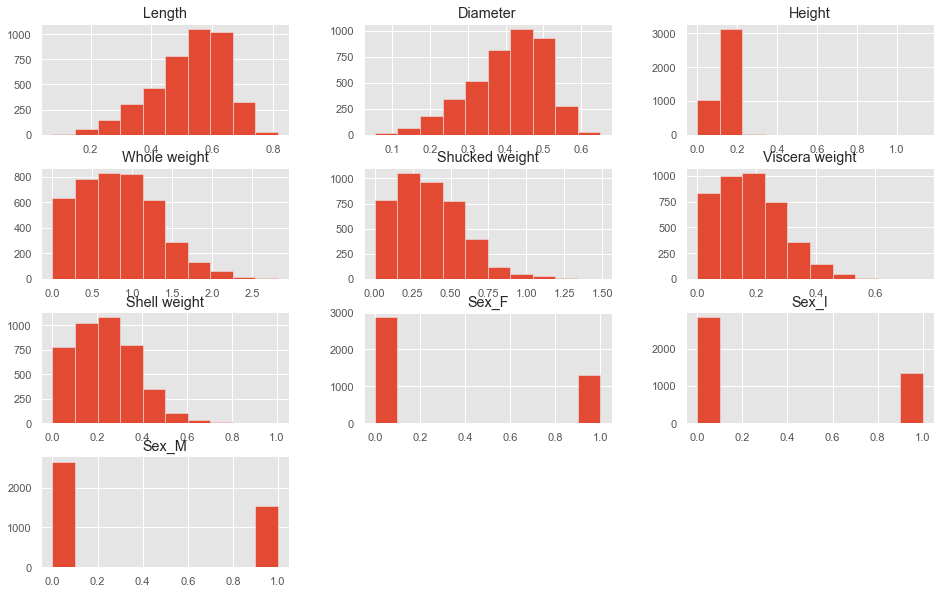

In [104]:
df_abalone.drop(['Rings'],1).hist()
plt.show()

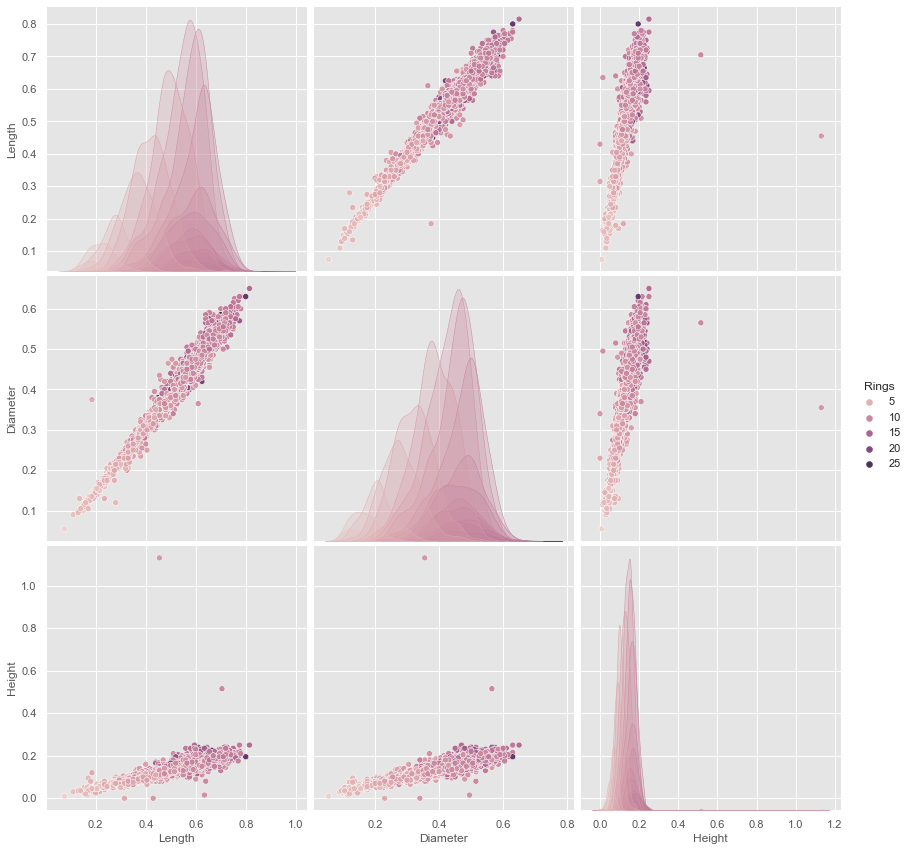

In [106]:
sb.pairplot(df_abalone.dropna(), hue='Rings',size=4,vars=["Length","Diameter","Height"],kind='scatter')

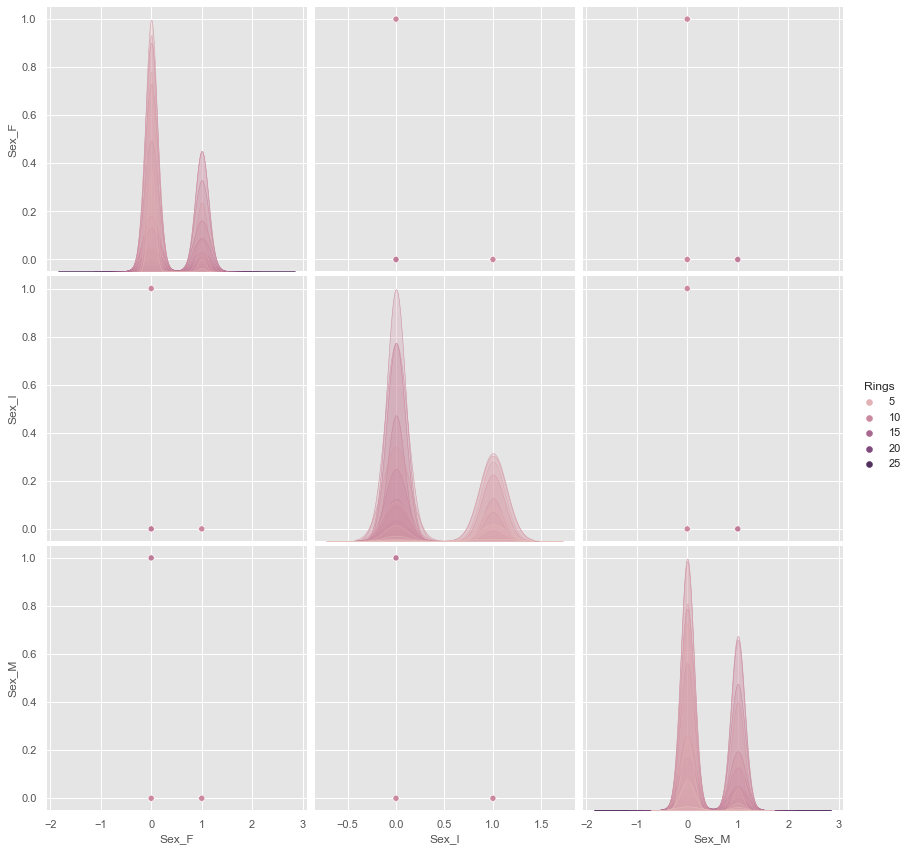

In [108]:
sb.pairplot(df_abalone.dropna(), hue='Rings',size=4,vars=["Sex_F","Sex_I","Sex_M"],kind='scatter')

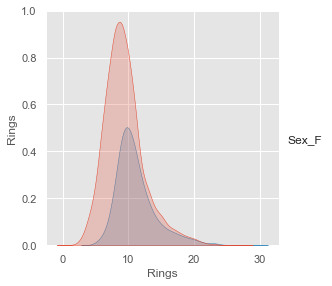

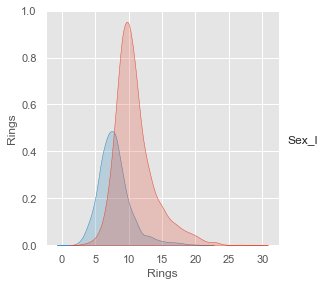

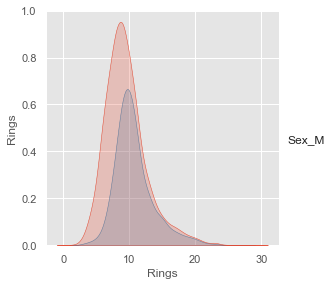

In [111]:
sb.pairplot(df_abalone.dropna(), hue='Sex_F',size=4,vars=["Rings"],kind='scatter')
sb.pairplot(df_abalone.dropna(), hue='Sex_I',size=4,vars=["Rings"],kind='scatter')
sb.pairplot(df_abalone.dropna(), hue='Sex_M',size=4,vars=["Rings"],kind='scatter')

In [109]:
#alimentamos el algoritmo
X = np.array(df_abalone[["Length","Diameter","Height"]])
y = np.array(df_abalone['Rings'])
X.shape

(4177, 3)

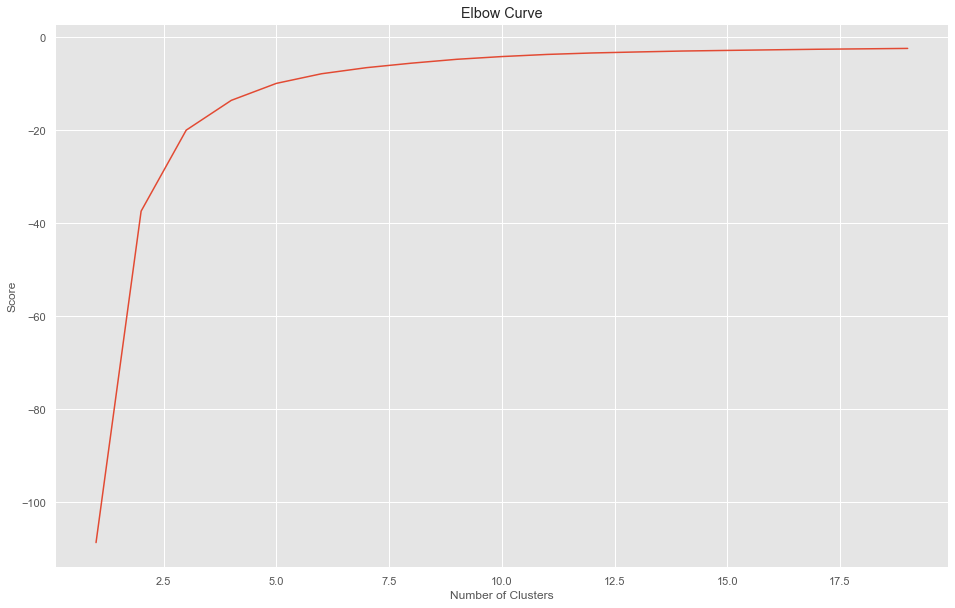

In [113]:
#Vamos a hallar el valor de K haciendo una gráfica e intentando hallar el “punto de codo” que comentábamos antes. Este es nuestro resultado:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()
#Realmente la curva es bastante “suave”. Considero a 5 como un buen número para K. Según vuestro criterio podría ser otro.

In [114]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.58364413 0.45725719 0.15606449]
 [0.26217105 0.19379934 0.065     ]
 [0.49339286 0.38218515 0.12973684]
 [0.39099092 0.29689864 0.09882753]
 [0.66718931 0.52662021 0.18441347]]


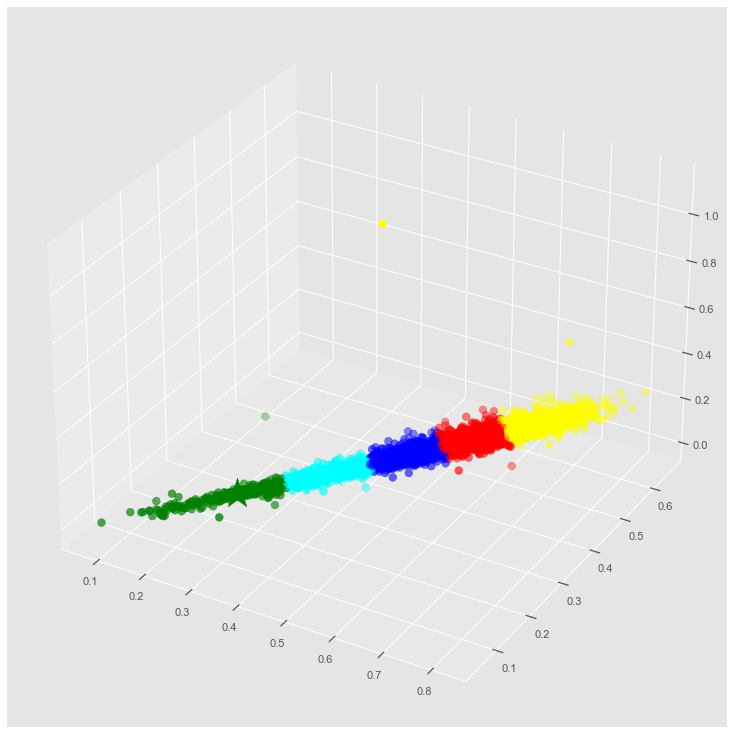

In [115]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

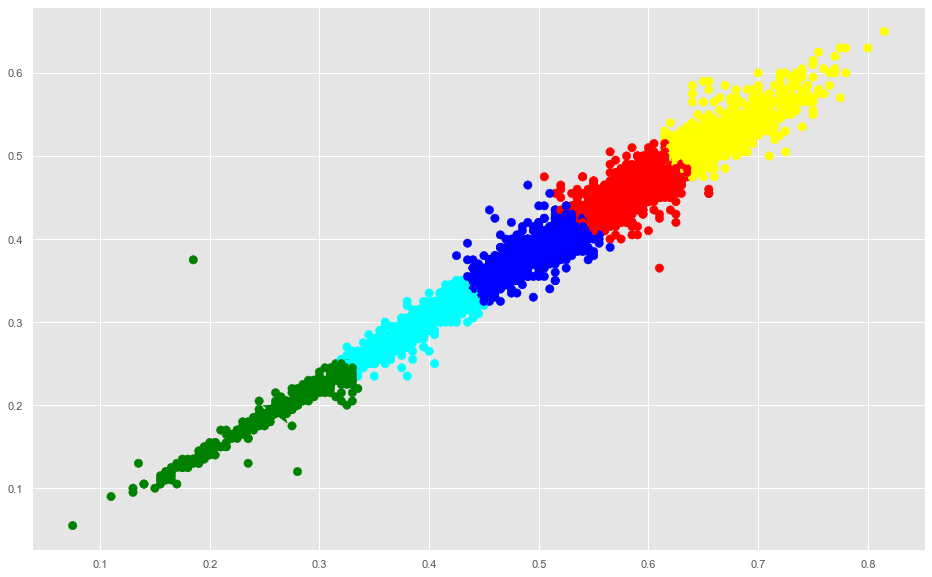

In [118]:
#Aqui podemos ver que el Algoritmo de K-Means con K=5 ha agrupado a los 140 usuarios Twitter por su personalidad, teniendo en cuenta las 3 dimensiones que utilizamos: Openess, Extraversion y Agreeablenes. Pareciera que no hay necesariamente una relación en los grupos con sus actividades de Celebrity.

# Getting the values and plotting it
f1 = df_abalone['Length'].values
f2 = df_abalone['Diameter'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

#Haremos 3 gráficas en 2 dimensiones con las proyecciones a partir de nuestra gráfica 3D para que nos ayude a visualizar los grupos y su clasificación:

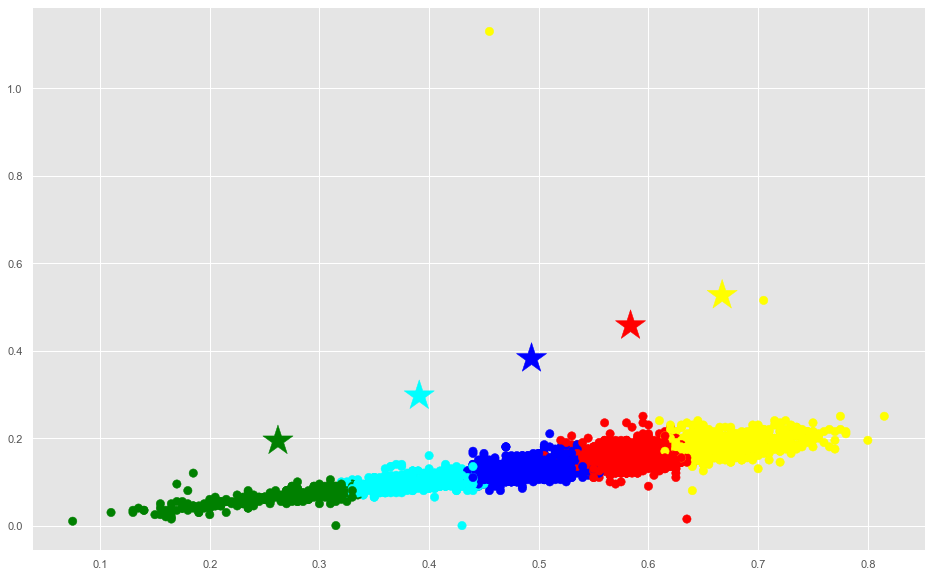

In [119]:
# Getting the values and plotting it
f1 = df_abalone['Length'].values
f2 = df_abalone['Height'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

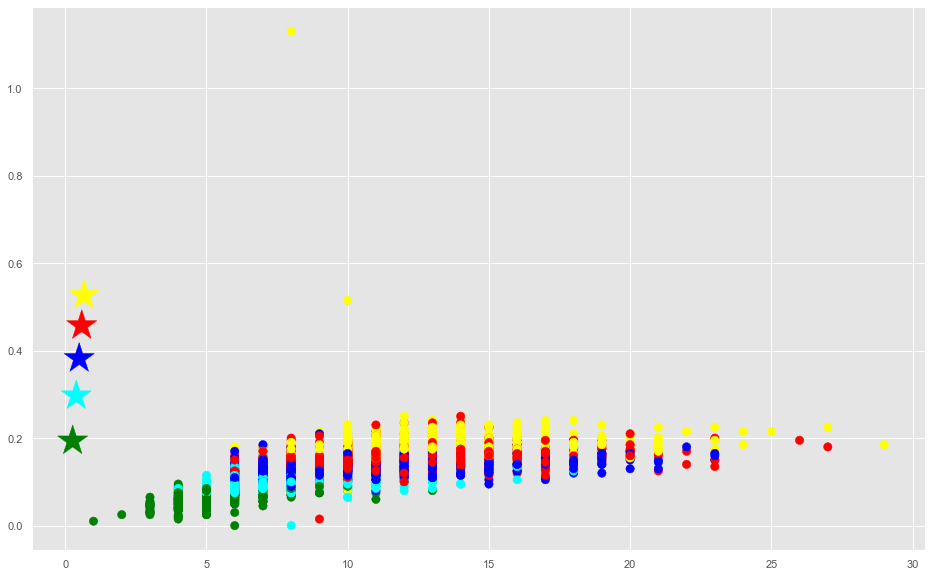

In [121]:
# Getting the values and plotting it
f1 = df_abalone['Rings'].values
f2 = df_abalone['Height'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [128]:

copy =  pd.DataFrame()
copy['Rings']=df_abalone['Rings'].values
copy['Rings']=df_abalone['Rings'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,1287
1,green,304
2,blue,1062
3,cyan,663
4,yellow,861
